In [1]:
suppressMessages(library(ggplot2))
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
library(data.table) 
set.seed(42)
addArchRThreads(threads = 64)

Setting default number of Parallel threads to 64.



In [2]:
proj <- loadArchRProject("./ArchRProject_epithelial", showLogo = FALSE)

Successfully loaded ArchRProject!



In [ ]:
# 读取 CSV，注意没有列名，第一列是 barcode，第二列是 CNV
cnv_data <- fread("/data/hanxue/CNV.csv", header = TRUE)
colnames(cnv_data)[1] <- "barcode" # 修改索引列列名

In [10]:
rownames(cnv_data) <- cnv_data$barcode
head(cnv_data)

barcode,CNV
<chr>,<chr>
18T#CAATCCCAGAACTCCT-1,CNV_high
18T#AACAGTCAGGCTCAGA-1,CNV_high
18T#AATGTCGAGGTCGGTA-1,CNV_high
18T#ACATGCACACACACAT-1,CNV_high
18T#CATGTTTTCGCGCTGA-1,CNV_high
18T#TGAGTCACACACACCG-1,CNV_high


In [14]:
# 生成“以 barcode 为名字”的 CNV 向量
cnv_vec <- cnv_data$CNV
names(cnv_vec) <- cnv_data$barcode

In [15]:
# 方式 A（最直接）：按 cellNames 对齐后直接赋值，未匹配的自动是 NA
proj$cnv <- cnv_vec[proj$cellNames]

In [22]:
table(is.na(proj$cnv))  # 看看有多少未匹配
head(proj$cnv)


FALSE  TRUE 
29021   698 

[1] NA         NA         "CNV_high" "CNV_high" "CNV_high" "CNV_high"

In [24]:
proj


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /home/hanxue/lab/scATAC/BCY_ATAC_R/joint/ArchRProject_epithelial 
samples(11): 10T 10N ... 22T 12T
sampleColData names(1): ArrowFiles
cellColData names(34): Sample TSSEnrichment ... cnvPredictedGroup cnv
numberOfCells(1): 29719
medianTSS(1): 15.447
medianFrags(1): 17279

In [3]:
proj <- addUMAP(
    ArchRProj = proj,
    reducedDims = "IterativeLSI",
    name = "UMAP_epi",
    nNeighbors = 30,   # 默认是 15，可以尝试 30 或更大
    minDist = 0.3,     # 默认是 0.1，可以尝试 0.05 或更小
    metric = "cosine",  # 可以尝试不同的距离度量，如 "euclidean", "manhattan"
    force = TRUE
)

Filtering 1 dims correlated > 0.75 to log10(depth + 1)

15:37:50 UMAP embedding parameters a = 0.9922 b = 1.112

15:37:50 Read 29719 rows and found 29 numeric columns

15:37:50 Using Annoy for neighbor search, n_neighbors = 30

15:37:50 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*


*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:37:53 Writing NN index file to temp file /tmp/RtmpjoXxSS/file889d0574e520e

15:37:53 Searching Annoy index using 48 threads, search_k = 3000

15:37:53 Annoy recall = 100%

15:37:54 Commencing smooth kNN distance calibration using 48 threads
 with target n_neighbors = 30

15:37:55 Initializing from normalized Laplacian + noise (using RSpectra)

15:38:02 Commencing optimization for 200 epochs, with 1362432 positive edges

15:38:02 Using rng type: pcg

15:38:21 Optimization finished

15:38:21 Creating temp model dir /tmp/RtmpjoXxSS/dir889d03b13cf9e

15:38:21 Creating dir /tmp/RtmpjoXxSS/dir889d03b13cf9e

15:38:24 Changing to /tmp/RtmpjoXxSS/dir889d03b13cf9e

15:38:24 Creating /home/hanxue/lab/scATAC/BCY_ATAC_R/joint/ArchRProject_epithelial/Embeddings/Save-Uwot-UMAP-Params-IterativeLSI-889d01701e61d-Date-2025-09-05_Time-15-38-21.786046.tar



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-19041e2ca8607b-Date-2025-02-28_Time-08-19-15.257015.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding



ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-19041e2ca8607b-Date-2025-02-28_Time-08-19-15.257015.log



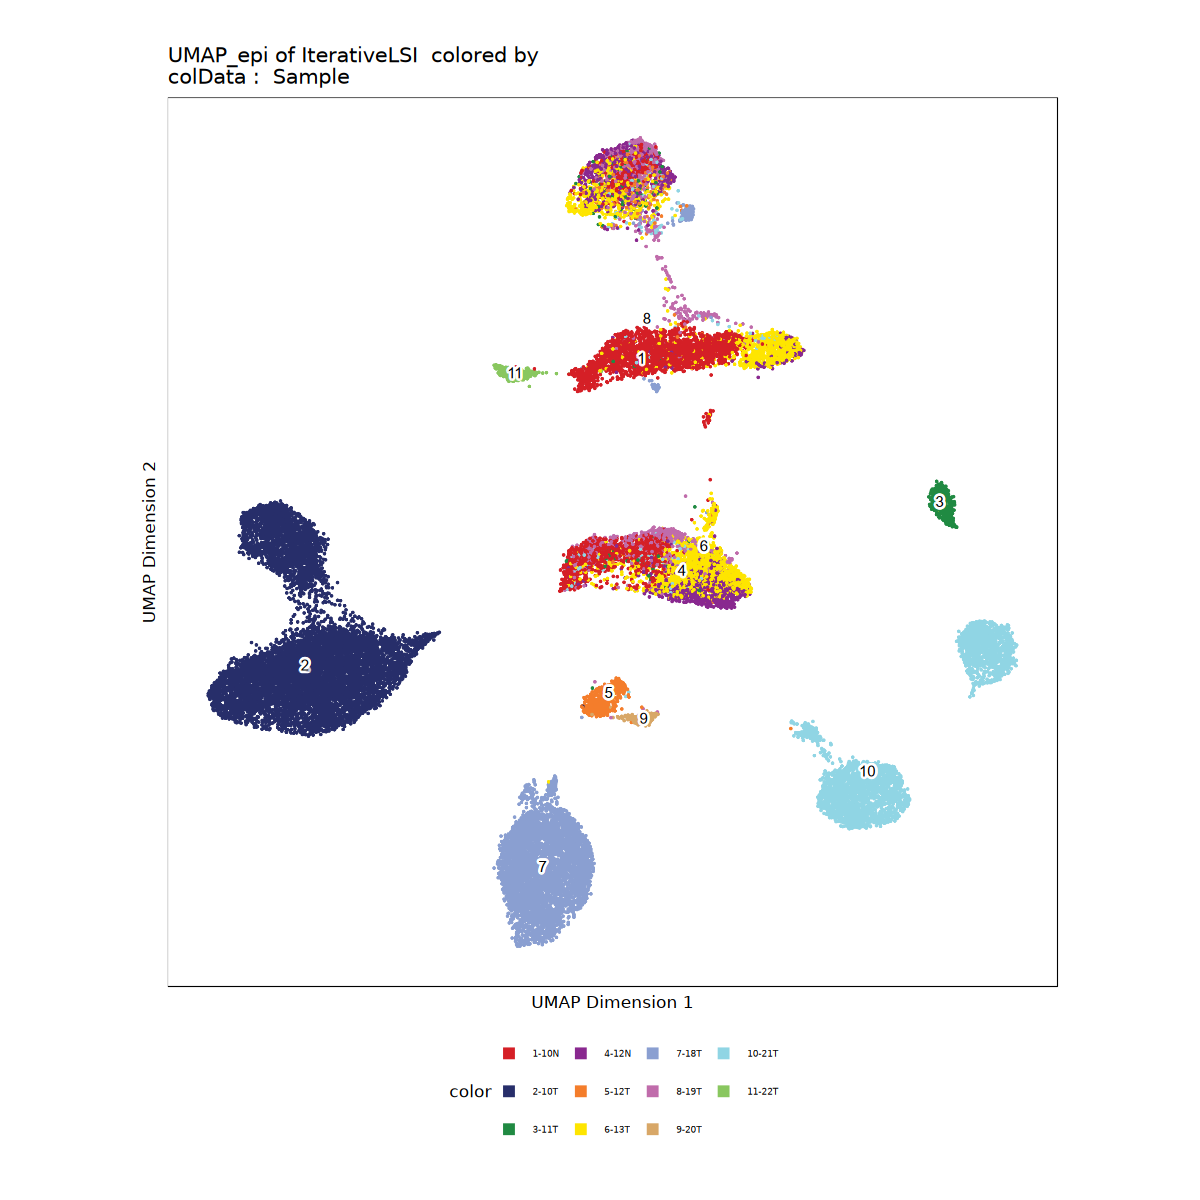

In [38]:
p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "Sample", 
    embedding = "UMAP_epi"
    )
p

In [5]:
proj <- addClusters(proj, name = "clusters", resolution = 0.5, force = TRUE)

ArchR logging to : ArchRLogs/ArchR-addClusters-133c515b075a6e-Date-2025-09-06_Time-14-17-50.219658.log
If there is an issue, please report to github with logFile!

Overriding previous entry for clusters

Filtering 1 dims correlated > 0.75 to log10(depth + 1)



2025-09-06 14:17:52.33803 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.034 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 29719
Number of edges: 1132858

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9403
Number of communities: 18
Elapsed time: 5 seconds


2025-09-06 14:18:27.659946 : Testing Biased Clusters, 0.623 mins elapsed.

2025-09-06 14:18:28.846145 : Identified Biased Clusters (n = 1), set filterBias = TRUE to re-assign these cells: , 0.642 mins elapsed.

Biased Clusters : 
Cluster6 


2025-09-06 14:18:28.852451 : Testing Outlier Clusters, 0.642 mins elapsed.

2025-09-06 14:18:28.856243 : Assigning Cluster Names to 18 Clusters, 0.642 mins elapsed.

2025-09-06 14:18:28.923022 : Finished addClusters, 0.644 mins elapsed.



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1c343c5509d32f-Date-2025-09-10_Time-09-00-29.475097.log
If there is an issue, please report to github with logFile!



Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1c343c5509d32f-Date-2025-09-10_Time-09-00-29.475097.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1c343c27de80d9-Date-2025-09-10_Time-09-00-30.008739.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1c343c27de80d9-Date-2025-09-10_Time-09-00-30.008739.log



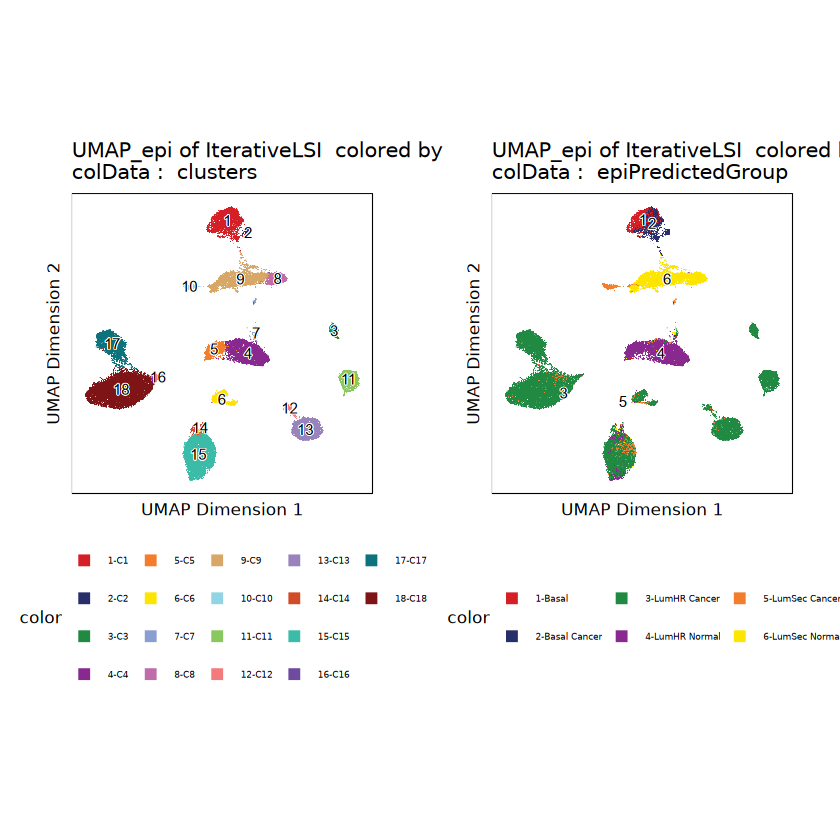

In [27]:
p1 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "clusters", 
    embedding = "UMAP_epi"
    )

p2 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "epiPredictedGroup", 
    embedding = "UMAP_epi"
    )
ggAlignPlots(p1, p2, type = "h")

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-37e8b2f8576b3-Date-2025-09-11_Time-02-01-12.374103.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-37e8b2f8576b3-Date-2025-09-11_Time-02-01-12.374103.log



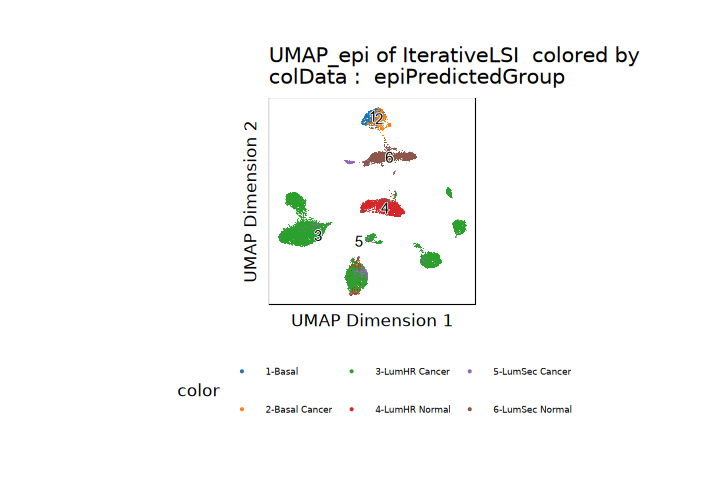

In [8]:
EPITHELIAL_COLORS <- c(
  "Basal"         = "#1f77b4",
  "Basal Cancer"  = "#ff7f0e",
  "LumHR Cancer"  = "#2ca02c",
  "LumHR Normal"  = "#d62728",
  "LumSec Cancer" = "#9467bd",
  "LumSec Normal" = "#8c564b"
)

# 取当前数据里实际存在的分组
groups_present <- sort(unique(proj$epiPredictedGroup))

# 为未在字典中的分组补充颜色（不覆盖已指定颜色）
unknown_groups <- setdiff(groups_present, names(EPITHELIAL_COLORS))
if (length(unknown_groups) > 0) {
  extra_cols <- ArchR::paletteDiscrete(unknown_groups)
  pal_use <- c(EPITHELIAL_COLORS, extra_cols)[groups_present]
} else {
  pal_use <- EPITHELIAL_COLORS[groups_present]
}

#（可选）把因子水平固定到颜色顺序，避免图例/颜色错位
proj$epiPredictedGroup <- factor(proj$epiPredictedGroup, levels = groups_present)

# 绘制 UMAP，并使用指定颜色
p2 <- plotEmbedding(
  ArchRProj = proj,
  colorBy   = "cellColData",
  name      = "epiPredictedGroup",
  embedding = "UMAP_epi",
  pal       = pal_use
)
p2

In [9]:
plotPDF(p2, name = "UMAP_epi_ATAC.pdf", ArchRProj = proj, addDOC = FALSE, width = 5, height = 5)

Plotting Ggplot!



Plotting Ggplot!



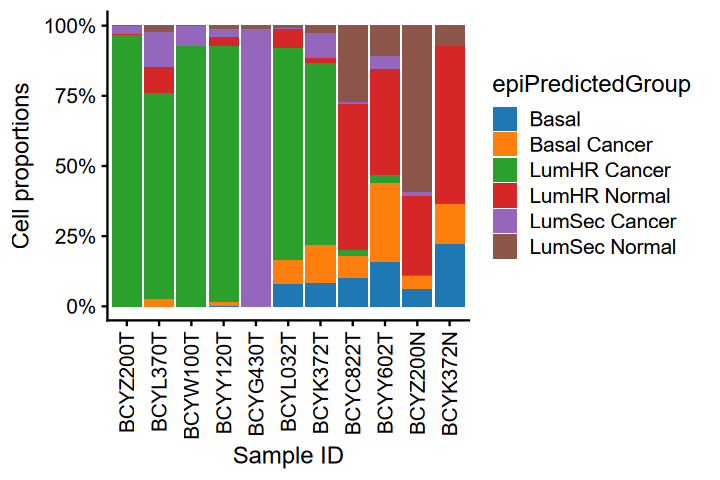

In [7]:
library(ggplot2)
library(cowplot)
library(scales)

# 1) 计算各样本中细胞类型的比例
sample_cell_type_distribution <- table(proj$Sample, proj$epiPredictedGroup)
sample_cell_type_distribution <- prop.table(sample_cell_type_distribution, 1)

# 转换为数据框
df_sample <- as.data.frame(sample_cell_type_distribution)
colnames(df_sample) <- c("Sample", "epiPredictedGroup", "Proportion")

# 1) 按列表映射修改 Sample（barlabels1 -> barlabels2），并按映射后的顺序在横轴展示
barlabels1 <- c('10T','18T','20T','21T','22T','11T','12T','13T','19T','10N','12N')
barlabels2 <- c('BCYZ200T','BCYL370T','BCYW100T','BCYY120T','BCYG430T',
                'BCYL032T','BCYK372T','BCYC822T','BCYY602T','BCYZ200N','BCYK372N')
sample_map <- setNames(barlabels2, barlabels1)

# 将原 Sample 替换为映射后的 ID，并设定在横轴的显示顺序
df_sample$Sample_mapped <- sample_map[as.character(df_sample$Sample)]
df_sample$Sample_mapped <- factor(df_sample$Sample_mapped, levels = barlabels2)

# 2) 为 epiPredictedGroup 指定颜色（名称需与分组值一致）
EPITHELIAL_COLORS <- c(
  "Basal"          = "#1f77b4",  # 正常上皮 - 蓝
  "Basal Cancer"   = "#ff7f0e",
  "LumHR Cancer"   = "#2ca02c",
  "LumHR Normal"   = "#d62728",
  "LumSec Cancer"  = "#9467bd",
  "LumSec Normal"  = "#8c564b"
)

#（可选）将分组因子顺序设为颜色向量的顺序，确保图例与颜色一一对应
df_sample$epiPredictedGroup <- factor(df_sample$epiPredictedGroup,
                                      levels = names(EPITHELIAL_COLORS))

# 3) 纵轴显示百分比；横轴显示映射后的 Sample ID，刻度旋转 90°；轴名称按要求设置
p <- ggplot(df_sample, aes(x = Sample_mapped, y = Proportion, fill = epiPredictedGroup)) +
  geom_bar(stat = "identity", position = position_stack(reverse = TRUE)) +
  scale_fill_manual(values = EPITHELIAL_COLORS, breaks = names(EPITHELIAL_COLORS)) +
  scale_y_continuous(labels = percent_format(accuracy = 1)) +
  theme_cowplot() +
  xlab("Sample ID") +
  ylab("Cell proportions") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +
  labs(fill = "epiPredictedGroup")

options(repr.plot.width = 6, repr.plot.height = 4)
p
plotPDF(p, name = "ATAC-epiType-Distribution.pdf", ArchRProj = proj, addDOC = FALSE, width = 6, height = 4)
# ggsave("/data/hanxue/BCY_ATAC/joint_output/ATAC-epiType-Distribution.svg",
#        plot = p, width = 6, height = 4, device = "svg")


In [18]:
cell_annotations <- list(
    "Basal" = paste0("C", c(1:2)),
    "LumHR" = paste0("C", c(3:7,11:18)),
    "LumSec" = paste0("C", c(8:10))
)

In [19]:
## 根据cell——annotations和proj$Clusters创建proj$cellType列
# 对于cell_annotations中的每一个元素（细胞类型）返回proj$Clusters中对应的索引
idz <- lapply(cell_annotations, function(x) which(proj$clusters %in% x))
# 创建proj$cellType列，长度为proj@cellColData的行数，初始化为NA
proj$epiType <- rep(NA, nrow(proj@cellColData))
# 遍历idz中的每一个元素，将proj$cellType中对应的索引赋值为元素的名称
for(i in names(idz)){proj$epiType[idz[[i]]] <- i}

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1c343ca318bde-Date-2025-09-10_Time-08-51-22.190602.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding



ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1c343ca318bde-Date-2025-09-10_Time-08-51-22.190602.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1c343c521c7534-Date-2025-09-10_Time-08-51-22.711904.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1c343c521c7534-Date-2025-09-10_Time-08-51-22.711904.log



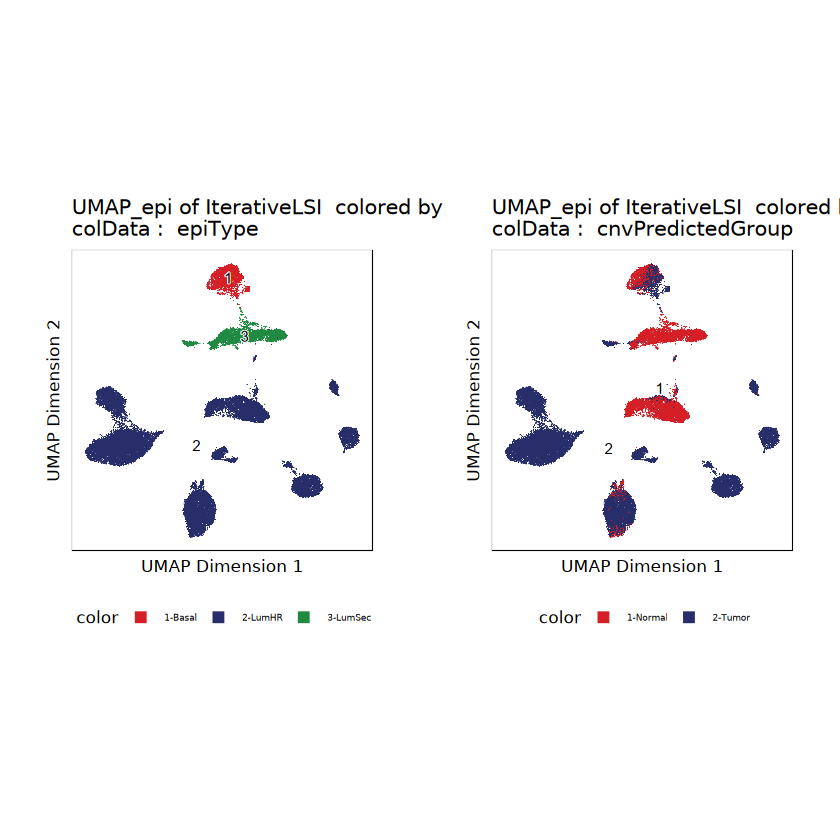

In [26]:
p1 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "epiType", 
    embedding = "UMAP_epi"
    )

p2 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "cnvPredictedGroup", 
    embedding = "UMAP_epi"
    )
ggAlignPlots(p1, p2, type = "h")

In [11]:
ggsave(
    plot = p1, 
    filename = "/data/hanxue/figures/UMAP_epiType_ATAC.svg", 
    width = 6, height = 5
    )

In [41]:
getAvailableMatrices(proj)

[1] "ATACMatrix"       "EncodeTFBSMatrix" "GeneScoreMatrix"  "MotifMatrix"     
[5] "PeakMatrix"       "TileMatrix"       "homerMatrix"

In [8]:
## marker gene analysis
markersGS <- getMarkerFeatures(
    ArchRProj = proj,
    useMatrix = "GeneScoreMatrix",
    groupBy = "clusters",
    bias = c("TSSEnrichment", "log10(nFrags)"),
    testMethod = "wilcoxon"
    )

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-889d0156c56a-Date-2025-09-05_Time-15-48-46.491294.log
If there is an issue, please report to github with logFile!



MatrixClass = Sparse.Double.Matrix

2025-09-05 15:48:46.725234 : Matching Known Biases, 0.003 mins elapsed.

###########
2025-09-05 15:50:30.401875 : Completed Pairwise Tests, 1.73 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-889d0156c56a-Date-2025-09-05_Time-15-48-46.491294.log



In [9]:
saveRDS(markersGS, file = "./ArchRProject_epithelial/markersGS.rds")

In [10]:
markerList <- getMarkers(markersGS, cutOff = "FDR <= 0.05 & Log2FC >= 1.25")
## Clusters差异基因，按照FDR排序，并保存为Excel文件
markerList <- lapply(markerList, as.data.frame)

for(i in 1:length(markerList)){
    markerList[[i]] <- markerList[[i]][order(markerList[[i]]$FDR), ]
}
                   
WriteXLS::WriteXLS(markerList,
                   ExcelFileName = "./ArchRProject_epithelial/markersGS_FDR.xlsx",
                   SheetNames = names(markerList))

In [ ]:
# markersGS <- readRDS(file = "./ArchRProject_epithelial_C15/markersGS.rds")

ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-889d0199cb6ad-Date-2025-09-05_Time-15-50-51.923914.log
If there is an issue, please report to github with logFile!



Printing Top Marker Genes:

C1:

	MIR4689, LINC01672, TRNP1, CD164L2, POU3F1, PODN, FAM151A, KANK4, WLS, RPE65, LRRC8C, HFM1, AMY2A, LINC01145, LCE1C

C2:

	TP73, DHRS3, MIR3972, IFFO2, LINC01141, IFNLR1, RPS6KA1, MIR1976, TINAGL1, GJB5, GJB4, SSBP3, NFIA-AS2, LPAR3, CLCA2

C3:

	LINC01360, S100A7L2, FCRL4, MRLN, NKX6-2, VENTX, OR8J3, OR4D11, DEFB131B, PDZD3, CRTAM, OR6X1, LINC02470, TAS2R19, TAS2R31

C4:

	FAM167B, MARCKSL1, HPCA, RNF19B, TFAP2E, MYCL, RNU5F-1, TEX38, EFCAB14-AS1, CYP4Z1, FOXE3, FOXD2, SLC5A9, FOXD3-AS1, MIR6068

C5:

	CELA3A, LINC01756, HMGB4, INSL5, GBP3, LY9, SLC30A10, CHRM3, TUBAL3, FAM25G, ADAMTS14, MIR4295, LINC01561, ADAM12, MIR675

C6:

	C1orf158, PLA2G2D, GBP2, OR2T27, PTGDR2, KRTAP5-10, RGCC, LINC00379, SLC39A2, RLBP1, ALDH1A3, SNORA30, KRTAP4-1, KRTAP9-1, ZNF562

C7:

	HTR1D, GJA5, ITLN1, MIR5191, LINC00200, TMEM72, ANXA8L1, NODAL, LINC00858, CHST1, GLYATL2, MS4A2, VSTM5, IZUMO1R, GPR83

C8:

	LINC01714, UBR4, MFSD2A, TMEM61, CCDC18, VTCN1, ATP1B1, RGL1, PK

 [1] "ACTA2"    "KRT5"     "KRT14"    "KRT17"    "KRT8"     "KRT18"   
 [7] "KRT19"    "KRT7"     "KRT15"    "SLPI"     "KIT"      "LTF"     
[13] "ANKRD30A" "STC2"     "PRLR"     "PGR"      "NEAT1"    "XIST"    


Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-889d0199cb6ad-Date-2025-09-05_Time-15-50-51.923914.log



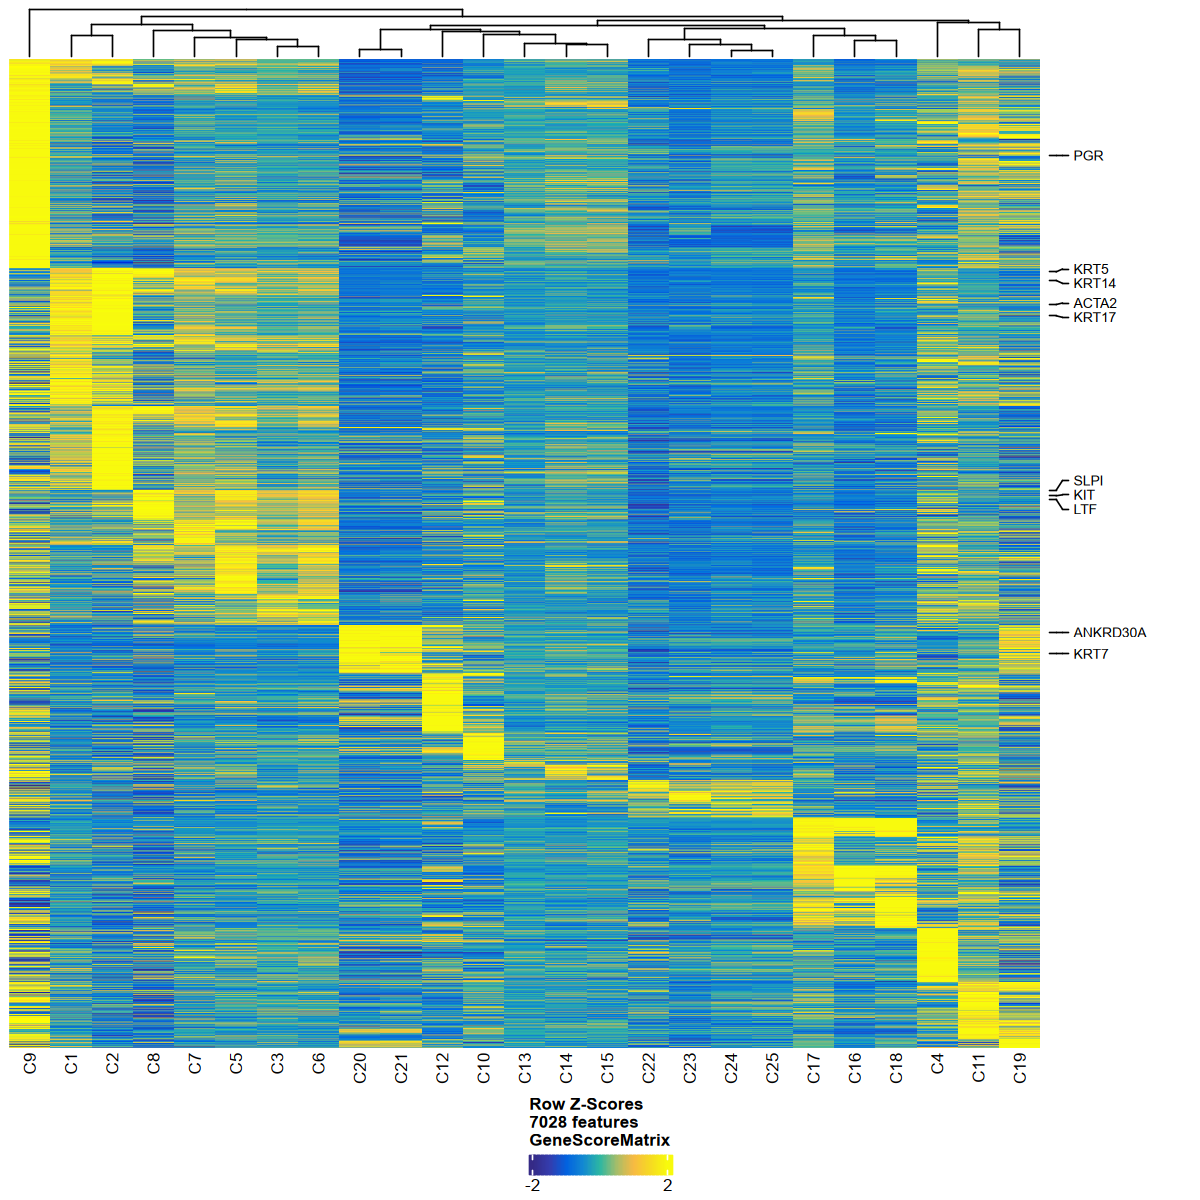

In [11]:
# Heatmap
## marker genes, 根据05_01_annotation中的显著表达来确定绘图的marker genes
markerGenes <- c(
    'ACTA2','KRT5', 'KRT14', 'KRT17', 'KRT8', 'KRT18', 'KRT19',  'KRT7','KRT15', 'SLPI',
                                          'KIT','LTF', 'ANKRD30A','STC2','PRLR','PGR', 'NEAT1', 'XIST'
)

heatmapGS <- plotMarkerHeatmap(
  seMarker = markersGS, 
  cutOff = "FDR <= 0.05 & Log2FC >= 1.25", 
  labelMarkers = markerGenes
)

options(repr.plot.height = 10, repr.plot.width = 10)
ComplexHeatmap::draw(heatmapGS, 
                     heatmap_legend_side = "bot", 
                     annotation_legend_side = "bot")

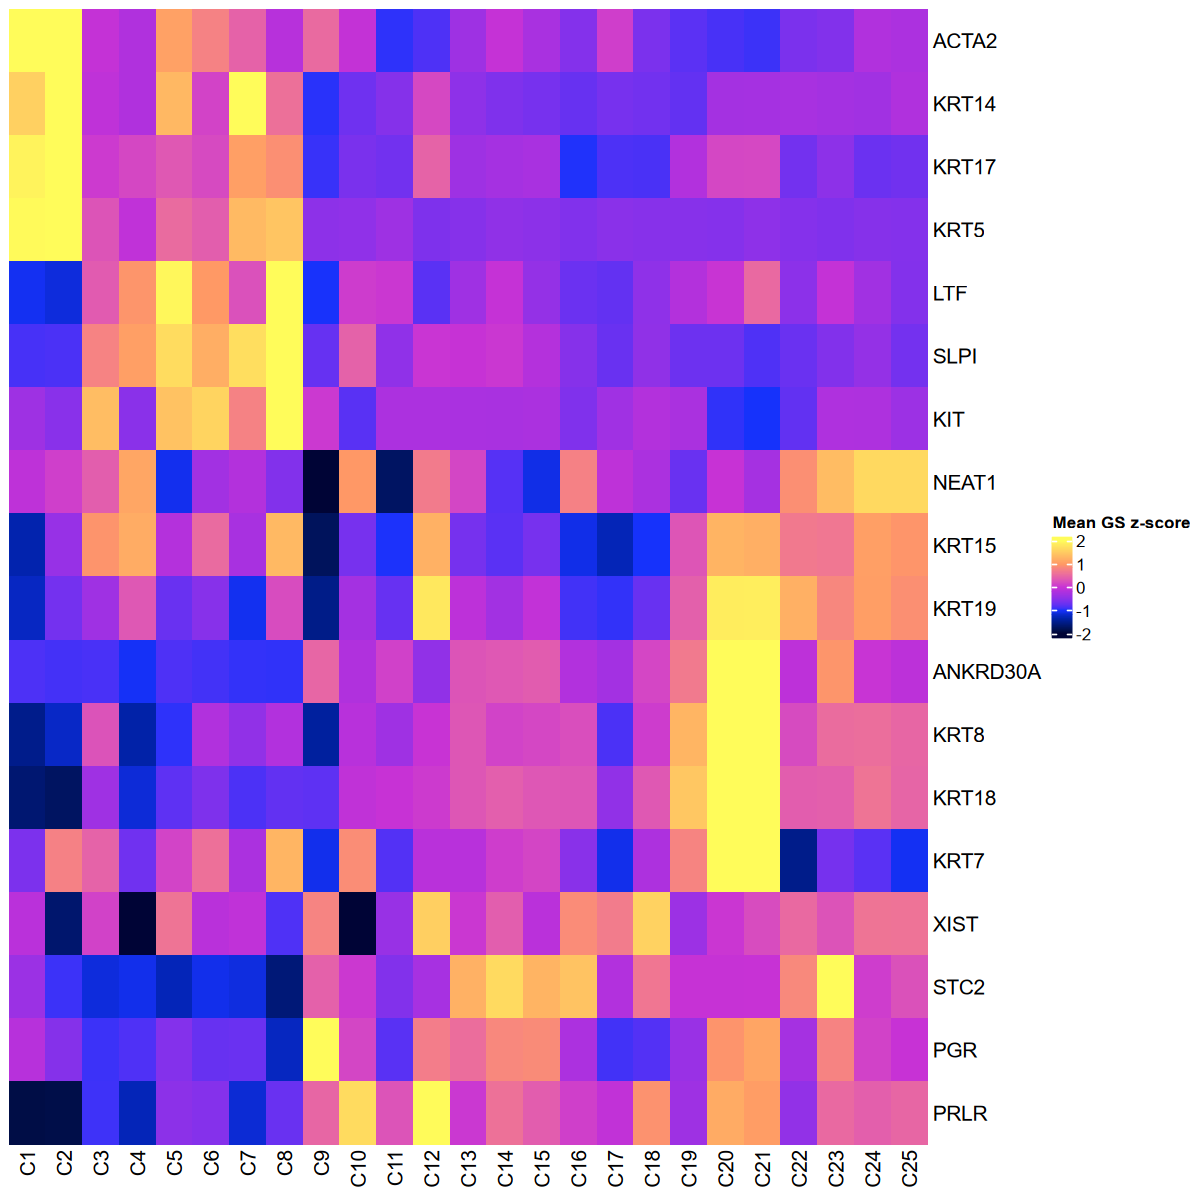

In [12]:
## 绘制只有marker基因的热图，Mean GS z-score

### 提取差异基因中在marker genes中的基因
idx <- which(mcols(markersGS)$name %in% markerGenes)
### 提取指定行，为矩阵
mtx <- assays(markersGS[idx,])$Mean %>% `rownames<-`(., mcols(markersGS)$name[idx])
### 标准化（z-score），并转置
mtx <- t(scale(t(mtx)))
### 定义层次聚类函数
fh <- function(x) hclust(dist(x), method="ward.D2")
### 定义颜色函数
col_fun1 <- colorRamp2(c(-2,-1,0,1,2), paletteContinuous(set = "horizonExtra", n = 5))

ht1 <- Heatmap(mtx, name = "Mean GS z-score", cluster_rows = fh, cluster_columns = F, show_row_dend = F, col = col_fun1)
# svg("/data/hanxue/BCY_ATAC/joint_output/Mean GS z-score.svg",width = 10, height = 10)
p3 <- draw(ht1)
p3
# dev.off()

添加分子分型  
11T: LuminalB,
12N: Normal,
12T: LuminalB,
13T: LuminalB,
19T: LuminalB-HER2

In [ ]:
### 添加分子分型信息到proj中
type_annotations <- list(
    "LuminalB" = c("11T", "12T", "13T", "10T", "18T"),
    "Normal" = c("12N", "10N"),
    "LuminalB-HER2" = c("19T", "20T", "21T", "22T")
)
idz <- lapply(type_annotations, function(x) which(proj$Sample %in% x))
# 创建proj$type列，长度为proj@cellColData的行数，初始化为NA
proj$type <- rep(NA, nrow(proj@cellColData))
# 遍历idz中的每一个元素，将proj$type中对应的索引赋值为元素的名称
for(i in names(idz)){proj$type[idz[[i]]] <- i}

In [ ]:
# ### 添加新辅前后信息到proj中
# neoadjuvant_annotations <- list(
#     "after_neoadjuvant" = c("11T", "12T", "12N", "13T", "19T"),
#     "without_neoadjuvant" = c("10N", "10T", "18T", "20T", "21T", "22T")
# )
# idz <- lapply(neoadjuvant_annotations, function(x) which(proj$Sample %in% x))
# # 创建proj$type列，长度为proj@cellColData的行数，初始化为NA
# proj$neoadjuvant <- rep(NA, nrow(proj@cellColData))
# # 遍历idz中的每一个元素，将combinedproj$type中对应的索引赋值为元素的名称
# for(i in names(idz)){proj$neoadjuvant[idz[[i]]] <- i}

In [43]:
## proj@cellColData提取Sample、clusters信息，为data.frame格式
data <- data.frame(Sample = proj@cellColData$Sample,type = proj@cellColData$type, clusters = proj@cellColData$clusters,neoadjuvant = proj@cellColData$neoadjuvant)
rownames(data) <- rownames(proj@cellColData)

In [44]:
## 添加分子分型，保存metadata.csv
write.csv(data, file = "./ArchRProject_epithelial/metadata.csv")

In [12]:
# 保存
saveArchRProject(ArchRProj = proj, 
                 load = FALSE)
sessionInfo()

Saving ArchRProject...



R version 4.4.1 (2024-06-14)
Platform: x86_64-conda-linux-gnu
Running under: Ubuntu 22.04.2 LTS

Matrix products: default
BLAS/LAPACK: /home/hanxue/miniconda3/envs/scseq/lib/libopenblasp-r0.3.21.so;  LAPACK version 3.9.0

Random number generation:
 RNG:     L'Ecuyer-CMRG 
 Normal:  Inversion 
 Sample:  Rejection 
 
locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
 [1] parallel  stats4    grid      stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] future_1.67.0               Signac_1.14.0              
 [3] Seurat_5.3.0                SeuratObject_5.2